In [1]:
%load_ext autoreload
%autoreload 2
from plot_hyperparameter import  plot_results_assessment
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import os
from pathlib import Path
import itertools
import string

import pandas as pd

In [107]:
results_columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]

results = pd.DataFrame(columns=results_columns )
results["Model"] = ["Isolation Forest", "Local Outlier Probability", "DB Scan", "Own Algorithm"]
print(results)

alphabet = list(string.ascii_uppercase)
perc_columns = ["Letter", "Isolation Forest", "Local Outlier Probability", "DB Scan", "Own Algorithm"]
percentages = pd.DataFrame(columns=perc_columns) 
#percentages["Letter"] = alphabet + ["Total"]
#columns for recieving the percentages

percentages_columns = alphabet + ["Total"]

                       Model Accuracy Precision Recall   F1
0           Isolation Forest      NaN       NaN    NaN  NaN
1  Local Outlier Probability      NaN       NaN    NaN  NaN
2                    DB Scan      NaN       NaN    NaN  NaN
3              Own Algorithm      NaN       NaN    NaN  NaN


# Isolation Forest

In [3]:
path_iso_for = Path("../../Data/Output_Data/02_Results_Ifor/Ifor_rel.csv").absolute()
path_db_scan = Path("../../Data/Output_Data/03_DBScan/result_DBSCAN_per_3std_4,16%.csv")
path_lop = Path("../../Data/Output_Data/04_Local_outlier_prob/results_lop_per_3std_4,16%_06_07.csv")
path_own_algo = Path("../../Data/Output_Data/05_Own_algorithm/results_per_own_algo_hyper_para_3std_4_16%.csv")

path_iso_val = Path("../../Data/Output_Data/02_Results_Ifor/Ifor_val.csv").absolute()

iso_for = pd.read_csv(path_iso_for)
db_scan = pd.read_csv(path_db_scan)
lop = pd.read_csv(path_lop)
own_algo = pd.read_csv(path_own_algo)
#iso_for.sort_values(by="accuracy", ascending=False).head()

In [108]:
solution = pd.read_csv("../../Data/Output_Data/solution_3std_4.16%.csv")
solution.columns = ["Letter", "Solution"]
solution

,Letter,Solution
0,A,0.040558
1,B,0.041775
2,C,0.043478
3,D,0.039752
4,E,0.041667
5,F,0.041290
6,G,0.041397
7,H,0.043597
8,I,0.042384
9,J,0.042838


In [106]:
db_scan.columns = ['Unnamed: 0', '_', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', 'Total', 'f1', 'accuracy', 'precision', 'recall']
own_algo.columns = ['Unnamed: 0', 'IQR', 't', 'a', 'Count', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', 'Total', 'f1', 'accuracy', 'precision',
       'recall']
lop.columns = ['Unnamed: 0', 'e', 'n', '%', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
       'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'Total', 'accuracy', 'f1', 'precision', 'recall']

,Model,Accuracy,Precision,Recall,F1
0,Isolation Forest,0.86562,0.058275,0.15625,0.08489
1,Local Outlier Probability,0.9801,0.747153,0.788462,0.767251
2,DB Scan,0.86765,0.192685,0.683894,0.300661
3,Own Algorithm,0.889304,0.077381,0.1625,0.104839


In [9]:
results.loc[results["Model"]=="Isolation Forest", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(iso_for.loc[iso_for["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Isolation Forest"] = list(iso_for.loc[iso_for["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="DB Scan", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(db_scan.loc[db_scan["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["DB Scan"] = list(db_scan.loc[db_scan["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="Local Outlier Probability", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(lop.loc[lop["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Local Outlier Probability"] = list(lop.loc[lop["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="Own Algorithm", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(own_algo.loc[own_algo["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Own Algorithm"] = list(own_algo.loc[lop["f1"].idxmax(), percentages_columns])
print(results.head())
print(percentages.head())

                       Model  Accuracy Precision    Recall        F1
0           Isolation Forest   0.86562  0.058275   0.15625   0.08489
1  Local Outlier Probability    0.9801  0.747153  0.788462  0.767251
2                    DB Scan   0.86765  0.192685  0.683894  0.300661
3              Own Algorithm  0.889304  0.077381    0.1625  0.104839
  Letter  Isolation Forest  Local Outlier Probability   DB Scan  Own Algorithm
0      A          0.069620                   0.049430  0.150824       0.012658
1      B          0.077922                   0.037859  0.168407       0.000000
2      C          0.202703                   0.047554  0.043478       0.006757
3      D          0.111801                   0.053416  0.175155       0.000000
4      E          0.058442                   0.040365  0.018229       0.000000


c:\Users\Dani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: bar() got multiple values for argument 'width'

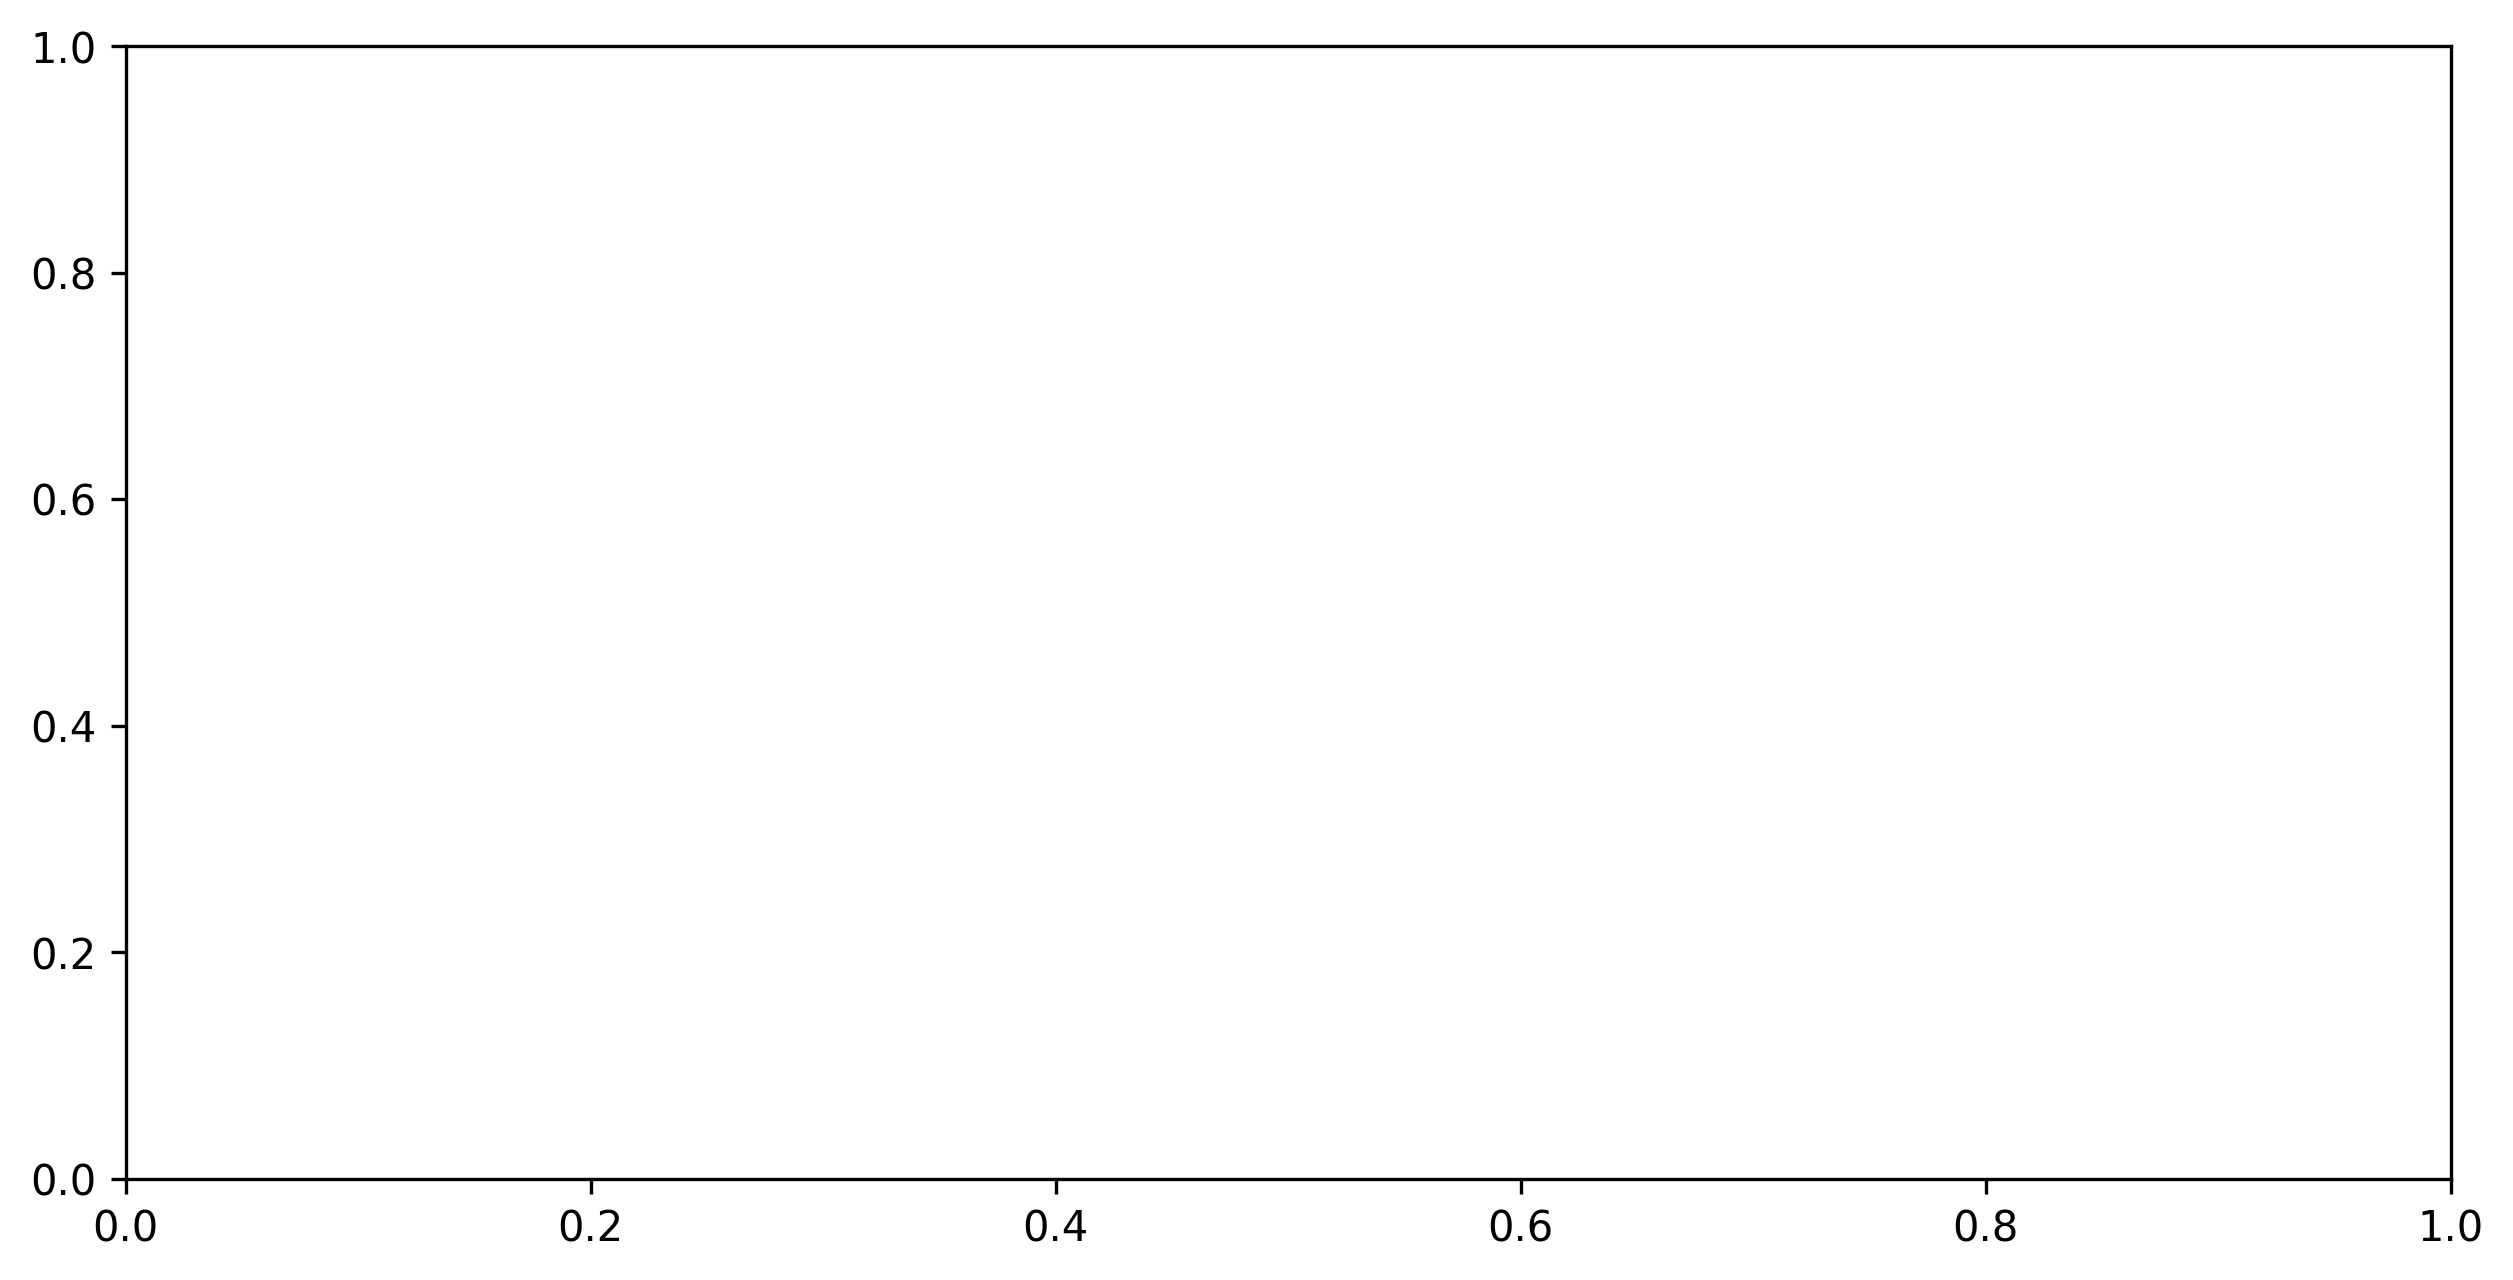

In [105]:
import seaborn as sns

#sns.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize = (10, 5))
 
measure = "F1"

# creating the bar plot
sns.barplot(results["Model"], results[measure], color ='#11699E',
        width = 0.4)
 
sns.xlabel("Model")
sns.ylabel(measure)
sns.title("F1 Score of the different models")
sns.show()
x = ["#11699E", "#F60045", "#B2B2B2", "#D9D9D9"]

In [25]:
np.array(list(percentages["Letter"])) +0.2

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

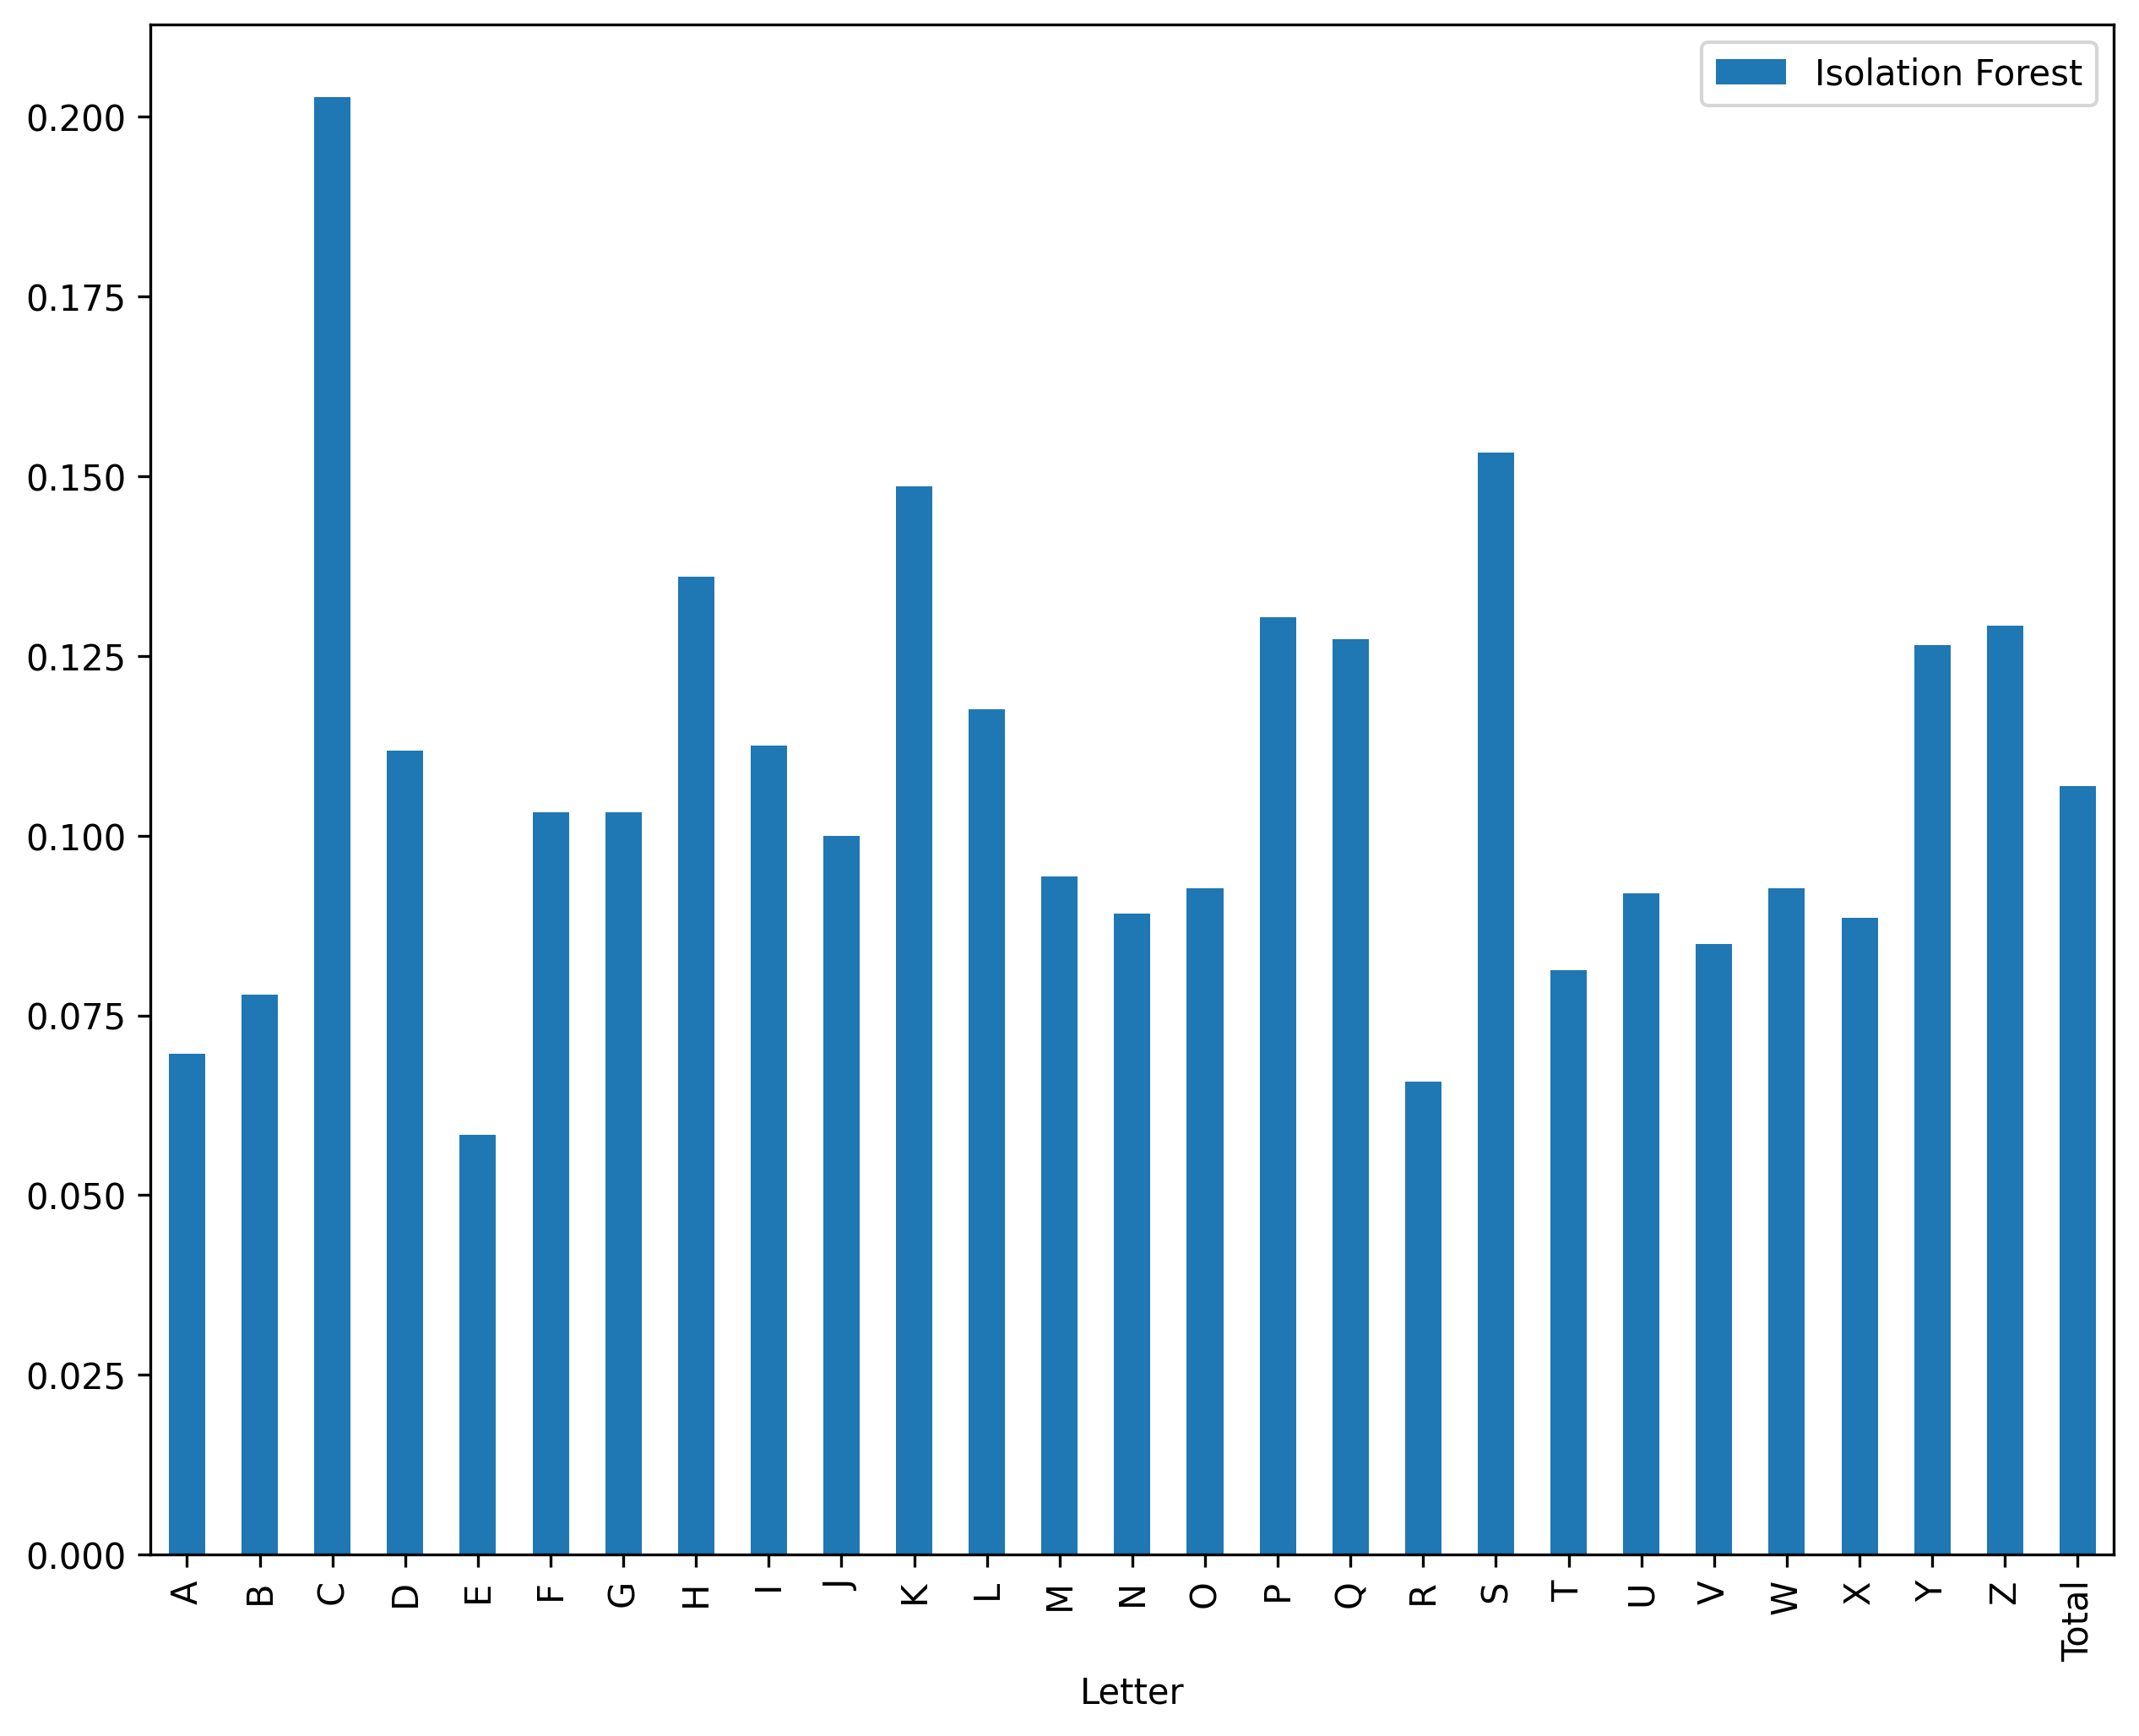

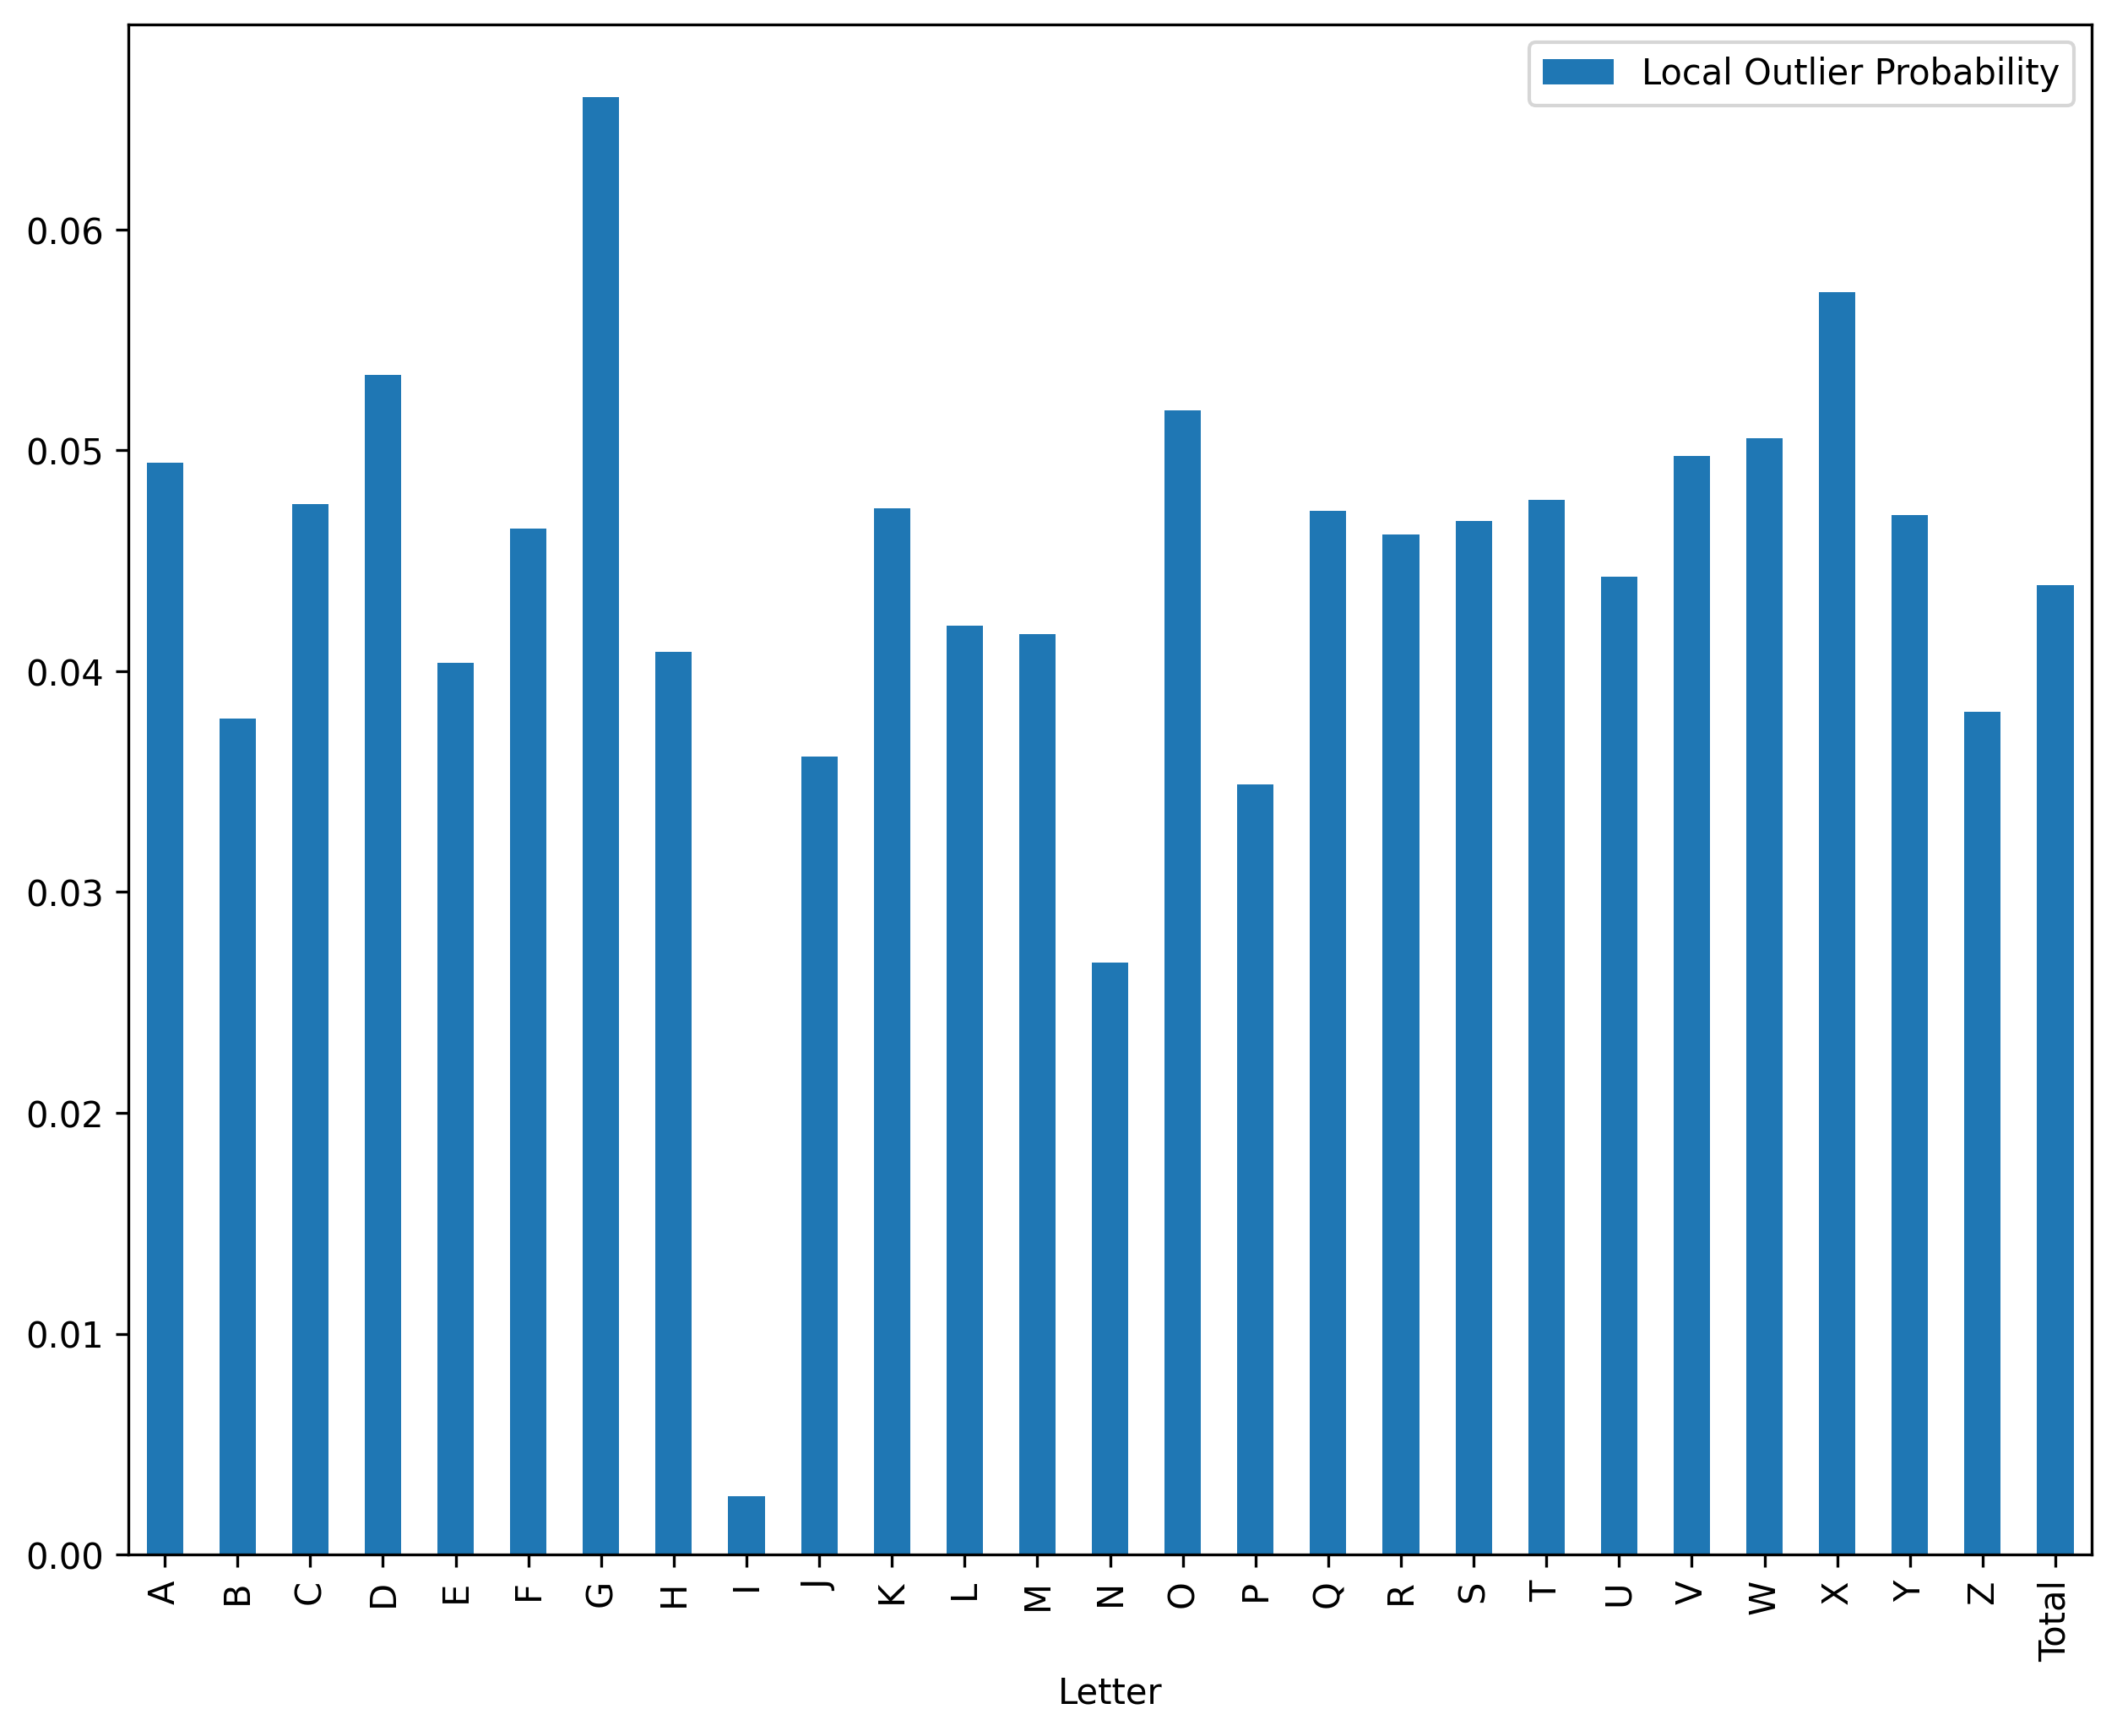

In [50]:
percentages.plot(x = "Letter", y ="Isolation Forest" , kind = "bar", figsize=(10, 8))
percentages.plot(x = "Letter", y ="Local Outlier Probability" , kind = "bar", figsize=(10, 8))
plt.show()

In [85]:
#plot_results(feature="%", input_filename=path_lop, output_filename=f"lpp_results_{parameter}.pdf")


,Letter,Solution
0,A,0.040558
1,B,0.041775
2,C,0.043478
3,D,0.039752
4,E,0.041667
5,F,0.041290
6,G,0.041397
7,H,0.043597
8,I,0.042384
9,J,0.042838


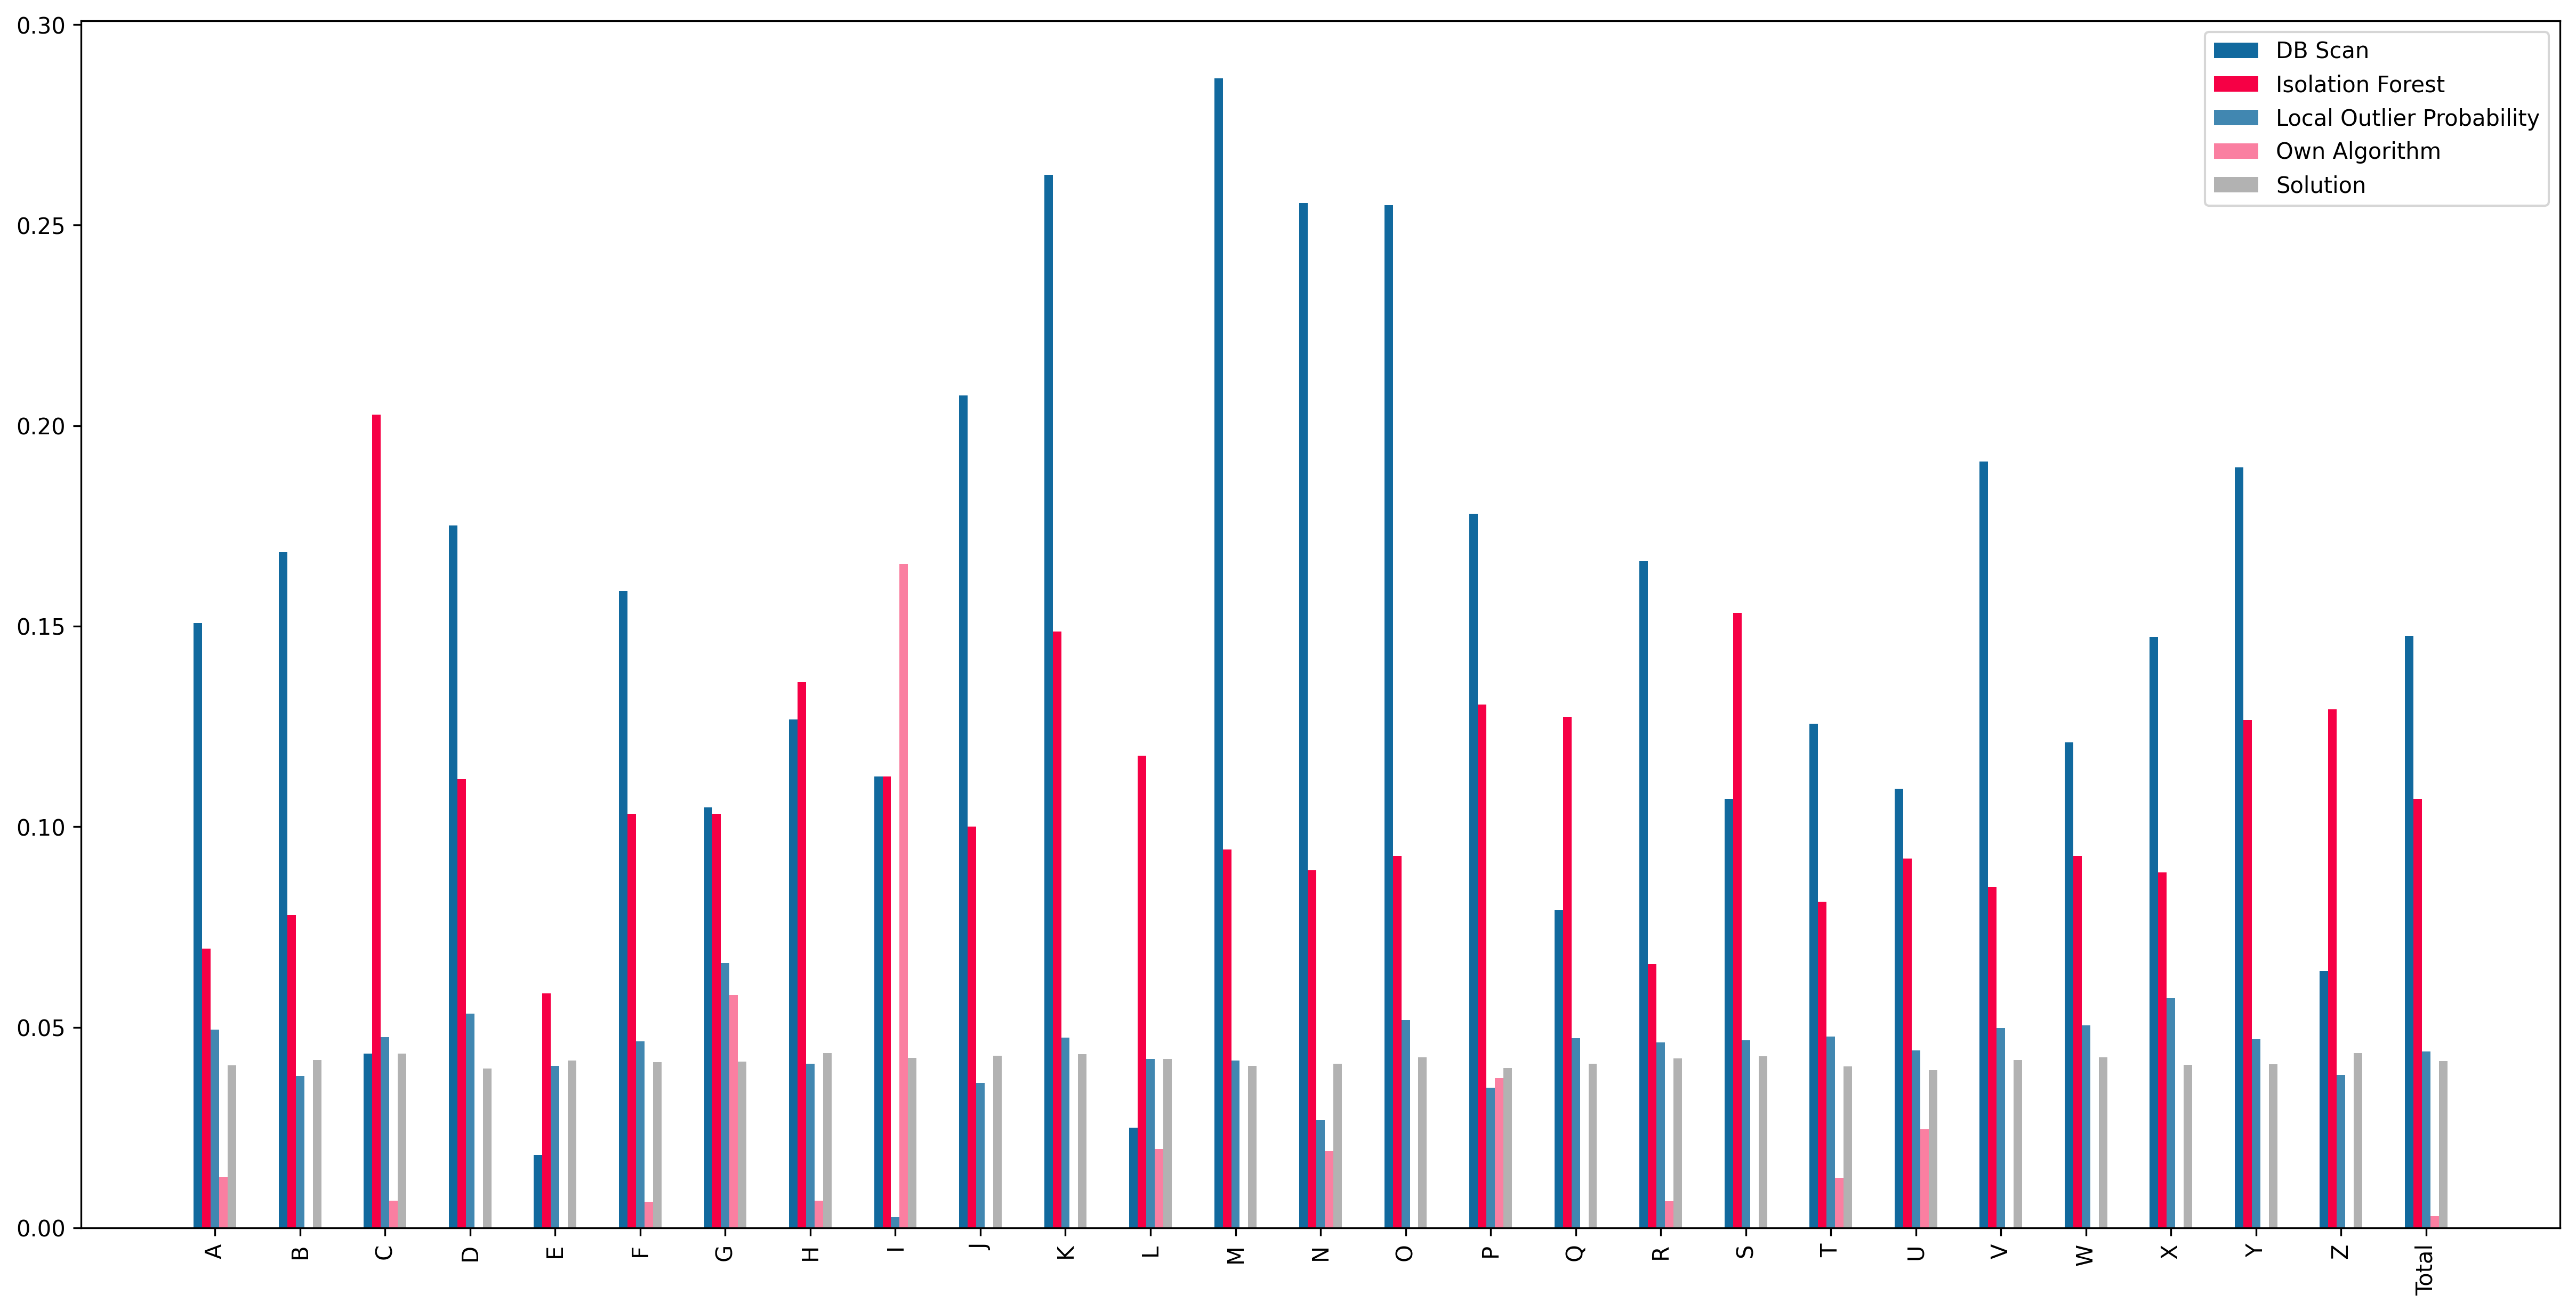

In [102]:
fig = plt.figure(figsize=(20,10))

plt.bar(np.arange(len(percentages)) - 0.2, height=percentages['DB Scan'], width=0.1, label='DB Scan', color='#11699E')
plt.bar(np.arange(len(percentages)) - 0.1, height=percentages['Isolation Forest'], width=0.1, label='Isolation Forest', color='#F60045')
plt.bar(np.arange(len(percentages)) , height=percentages['Local Outlier Probability'], width=0.1, label='Local Outlier Probability', color='#11699E', alpha=0.8)
plt.bar(np.arange(len(percentages)) + 0.1, height=percentages['Own Algorithm'], width=0.1, label='Own Algorithm', color='#F60045', alpha=0.5)
plt.bar(np.arange(len(solution)) + 0.2, height=solution['Solution'], width=0.1, label='Solution', color='#B2B2B2')
plt.xticks(range(0,27), labels=percentages['Letter'], rotation=90)
plt.legend()
plt.show(fig)